In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [239]:
# Consts 
k1 = 10**(-1.47)
k2 = 10**(-2.59)
k3 = 10**(-3.76)
k4 = 10**(-10.329)
# k4 = 10**(-8.8)
yppm = 415e-06

xCO2 0.876, xHCO3 0.124, xCO3 1.83e-06


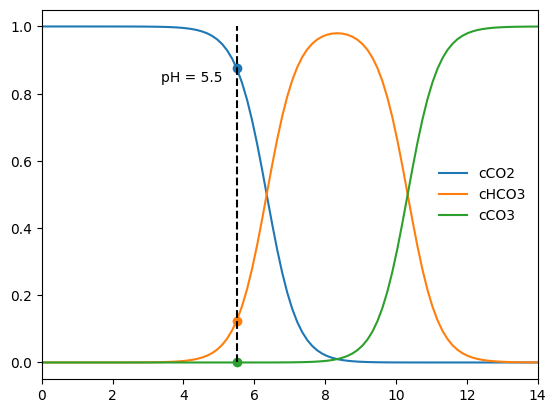

In [240]:
# Eq Consts Only
ph = 5.5 # Avoid if possible
cb = k1 * yppm * 1
cd = k2 * cb
ce = 10**(-ph)
cf = k3 * cd / ce
cg = k4 * cf / ce
ct = cb + cf + cg
print('xCO2 {:.3g}, xHCO3 {:.3g}, xCO3 {:.3g}'.format(cb/ct, cf/ct, cg/ct))

## functionalized
def phK(pH): 
    cb = k1 * yppm * 1
    cd = k2 * cb
    ce = 10**(-pH)
    cf = k3 * cd / ce
    cg = k4 * cf / ce
    ct = cb + cf + cg
    xs = [cb/ct, cf/ct, cg/ct]
    return xs

phs = np.linspace(0, 14, 100)
xs = phK(phs)
plt.plot(phs, xs[0], label='cCO2') 
plt.plot(phs, xs[1], label='cHCO3') 
plt.plot(phs, xs[2], label='cCO3') 
plt.plot([ph]*2, [0, 1], '--k')
plt.scatter(ph, cb/ct, c='C0')
plt.annotate('pH = {}'.format(ph), (ph, cb/ct), xytext = (-10, -10), textcoords='offset points', ha='right')
plt.scatter(ph, cf/ct, c='C1')
plt.scatter(ph, cg/ct, c='C2')

plt.xlim(0, 14)
plt.legend(frameon=False)
plt.show()

0.848732158552597 0.15126501196945055 4.6879584408421186e-11


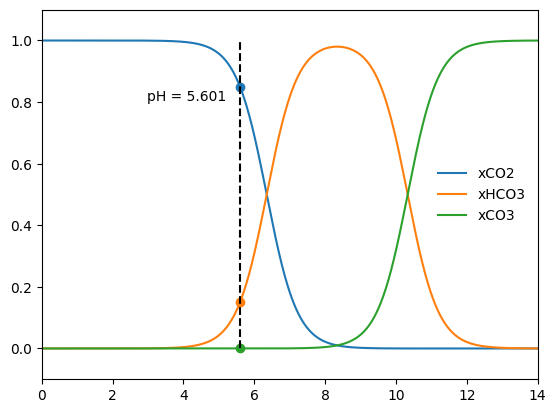

In [241]:
from scipy.optimize import fsolve 
import pandas as pd

# From ppm only (fully consistent)
cCO2 = k1*yppm
cH2CO3 = k2*cCO2
cH = float(fsolve(lambda x: cH2CO3 * k3 / x * (1 + 2*k4/x) - x, 0.5))
cHCO3 = k3*cH2CO3/cH
cCO3 = k4*cHCO3/cH

ct = cCO2 + cHCO3 + cCO3
print(cCO2/ct, cHCO3/ct, cCO3)

# functionalize
def phK3(yppm):
    cCO2 = k1*yppm
    cH2CO3 = k2*cCO2
    cH = float(fsolve(lambda x: cH2CO3 * k3 / x * (1 + 2*k4/x) - x, min(yppm, 1), xtol=1e-12))
    cHCO3 = k3*cH2CO3/cH
    cCO3 = k4*cHCO3/cH

    ct = cCO2 + cHCO3 + cCO3
    xs = (cCO2/ct, cHCO3/ct, cCO3/ct)   
    return -np.log10(cH), xs

ys = np.logspace(10, -30, 1000)
solx, soly = [phK3(i)[0] for i in ys], pd.DataFrame([phK3(i)[1] for i in ys], columns=['xCO2', 'xHCO3', 'xCO3'])
plt.plot(solx, soly.xCO2, label='xCO2')
plt.plot(solx, soly.xHCO3, label='xHCO3')
plt.plot(solx, soly.xCO3, label='xCO3')
phyppm, xCO2yppm = phK3(yppm)[0], phK3(yppm)[1][0]
plt.scatter(phyppm, xCO2yppm)
plt.annotate('pH = {:.4g}'.format(phyppm), xy=(phyppm, xCO2yppm), xytext = (-10, -10), textcoords='offset points', ha='right')
plt.scatter(phK3(yppm)[0], phK3(yppm)[1][1])
plt.scatter(phK3(yppm)[0], phK3(yppm)[1][2])
plt.plot([phyppm]*2, [0, 1], '--k')
plt.xlim(0, 14)
plt.ylim(-0.1, 1.1)
plt.legend(frameon=False)
plt.show()

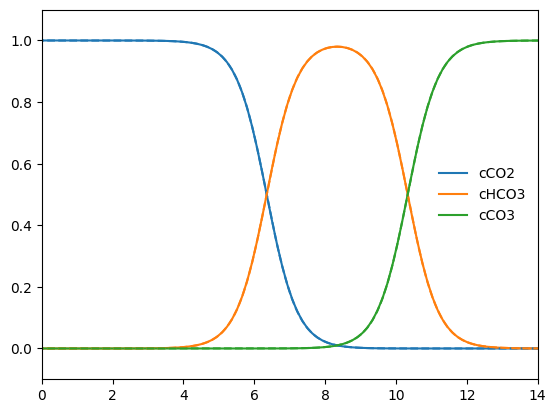

In [242]:
plt.plot(phs, xs[0], label='cCO2', c='C0') 
plt.plot(phs, xs[1], label='cHCO3',c='C1') 
plt.plot(phs, xs[2], label='cCO3', c='C2') 
plt.plot(solx, soly.xCO2,ls='--', c='C0')
plt.plot(solx, soly.xHCO3,ls='--',c='C1') 
plt.plot(solx, soly.xCO3,ls='--', c='C2')
plt.xlim(0, 14)
plt.ylim(-0.1, 1.1)
plt.legend(frameon=False)
plt.show()